# Курсовая работа
## Датасет: [Facial Expression Recognition](https://paperswithcode.com/dataset/fer2013)
### Выполнил Попов Матвей, группа М8О-114СВ-24


## О датасете

Используется для задач распознавания эмоций по лицам. Содержит 35887 
изображений лиц, которые распределены на 7 категорий эмоций:

* Angry (злой)
* Disgust (отвращение)
* Fear (страх)
* Happy (счастье)
* Sad (грусть)
* Surprise (удивление)
* Neutral (нейтральное выражение)

Каждое изображение черно-белое, разрешение 48x48 пикселей. Датасет представлен 
в формате csv и состоит из 2 колонок: эмоция (число от 0 до 6) и пиксели 
(строка с интенсивностями пикселей от 0 до 255, разделенных пробелами).


Подключаем необходимые импорты

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Загружаем датасет

In [ ]:
!curl -L -o fer2013.zip https://www.kaggle.com/api/v1/datasets/download/deadskull7/fer2013

In [ ]:
!unzip fer2013.zip -d fer2013

In [ ]:
data = pd.read_csv('fer2013/fer2013.csv')

Выведем структуру датасета

In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Инициализируем список эмоций

In [6]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

Выведем изображение из датасета

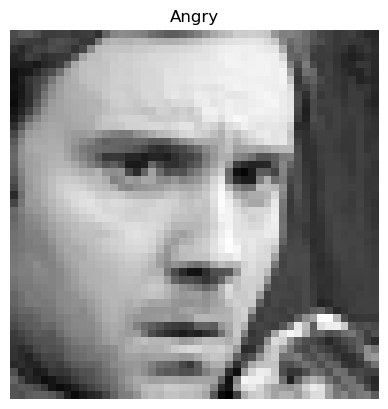

In [7]:
def plot_images(data):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    pixels = np.array(data.iloc[0, 1].split(), dtype='float32').reshape(48, 48)
    emotion = emotions[data.iloc[0, 0]]
    plt.imshow(pixels, cmap="gray")
    plt.title(emotion)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(data)


Выведем распределение лиц по эмоциям

Распределение лиц по категориям эмоций
Всего: 35887
Happy: 8989 (25.05%)
Neutral: 6198 (17.27%)
Sad: 6077 (16.93%)
Fear: 5121 (14.27%)
Angry: 4953 (13.80%)
Surprise: 4002 (11.15%)
Disgust: 547 (1.52%)


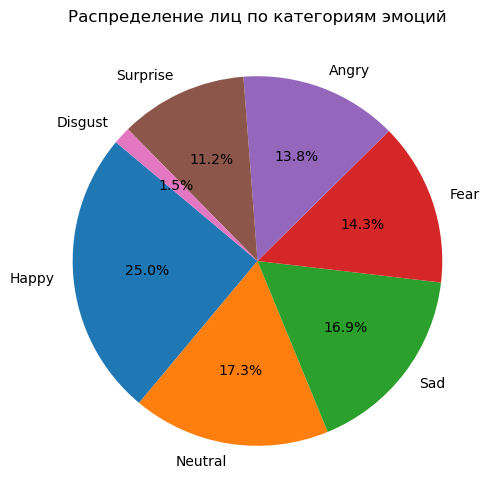

In [8]:
def emotion_distribution(data, emotions):
    emotion_counts = data['emotion'].value_counts()
    total = len(data)

    print('Распределение лиц по категориям эмоций')
    print(f'Всего: {total}')
    for i, count in emotion_counts.items():
        persentage = (count / total) * 100
        print(f'{emotions[i]}: {count} ({persentage:.2f}%)')
    
    emotion_percentages = (emotion_counts / total) * 100
    plt.figure(figsize=(8, 6))
    plt.pie(
        emotion_percentages, 
        labels=[emotions[i] for i in emotion_percentages.index], 
        autopct="%1.1f%%", 
        startangle=140, 
        colors=plt.cm.tab10.colors
    )
    plt.title('Распределение лиц по категориям эмоций')
    plt.show()

emotion_distribution(data, emotions)


## Обучение модели

Разделяем на обучающую и тестовую выборки

In [9]:
X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data["pixels"]]) / 255.0
y = to_categorical(data["emotion"], num_classes=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Создаем модель

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Обучаем модель

In [23]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.6053 - loss: 1.0257 - val_accuracy: 0.5448 - val_loss: 1.2015
Epoch 2/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.6159 - loss: 1.0073 - val_accuracy: 0.5423 - val_loss: 1.2118
Epoch 3/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.6264 - loss: 0.9726 - val_accuracy: 0.5468 - val_loss: 1.2323
Epoch 4/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.6339 - loss: 0.9700 - val_accuracy: 0.5517 - val_loss: 1.2188
Epoch 5/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.6423 - loss: 0.9418 - val_accuracy: 0.5528 - val_loss: 1.2161
Epoch 6/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.6536 - loss: 0.9150 - val_accuracy: 0.5559 - val_loss: 1.2248
Epoch 7/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.6531 - loss: 0.8950 - val_accuracy: 0.5531 - val_loss: 1.2404
Epoch 8/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.6619 - loss: 0.8796 - 

Результаты обучения

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5610 - loss: 1.2950
Точность на тестовых данных: 56.42%


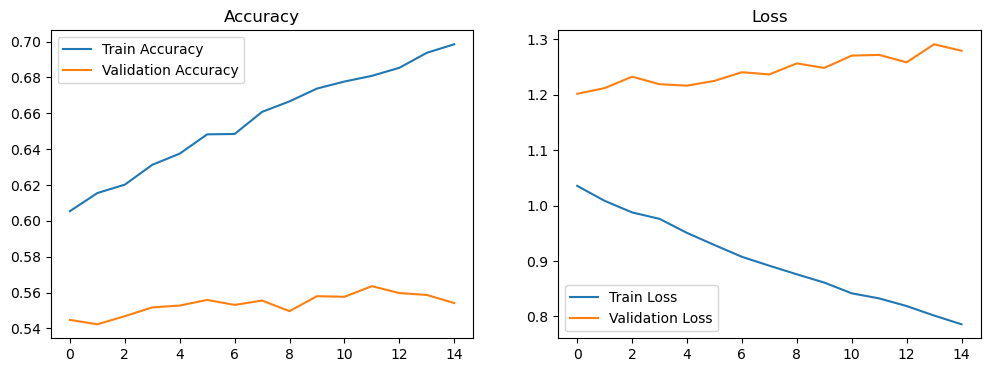

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

## Примеры использования модели

Функция для получения фото из файла и предсказания эмоции

In [25]:
def predict_emotion_from_file(image_path, model, emotions):
    img = Image.open(image_path).convert('L')
    img = img.resize((48, 48))
    img_array = np.array(img).reshape(1, 48, 48, 1) / 255.0
    
    prediction = model.predict(img_array)
    predicted_emotion = emotions[np.argmax(prediction)]
    
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()
    
    return predicted_emotion


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


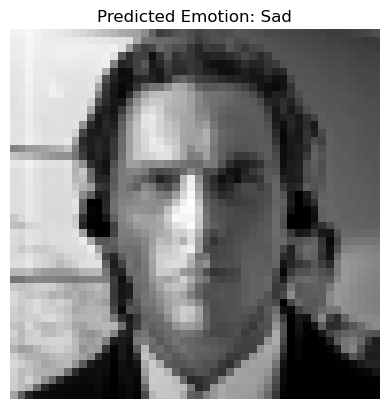

'Sad'

In [26]:
predict_emotion_from_file('img/patrick_bateman.jpg', model, emotions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


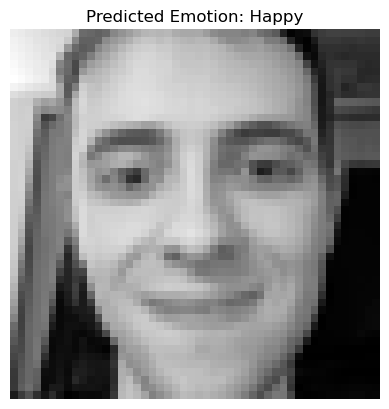

'Happy'

In [27]:
predict_emotion_from_file('img/happy_matvey_popov.jpg', model, emotions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


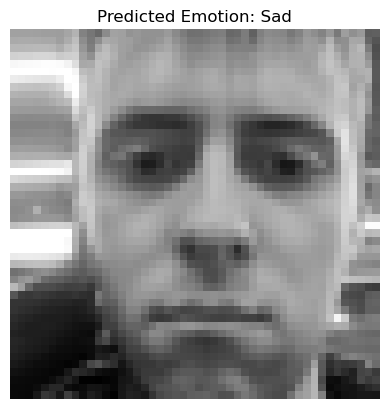

'Sad'

In [28]:
predict_emotion_from_file('img/sad_matvey_popov.jpg', model, emotions)

## Вывод

Решил задачу классификации эмоций человека на фотографиях. Точность на тестовых 
данных – 0.56
